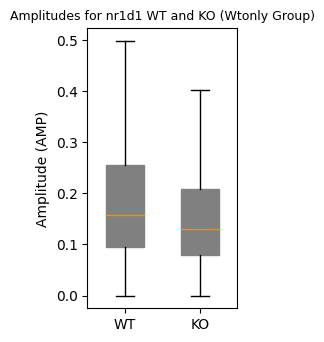

P-value for t-test between nr1d1 WT and KO: 6.75e-20


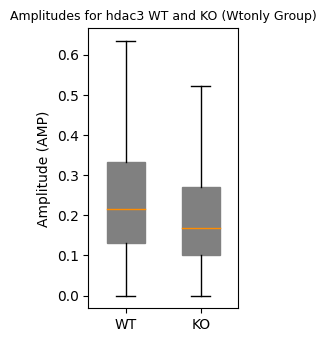

P-value for t-test between hdac3 WT and KO: 3.12e-35


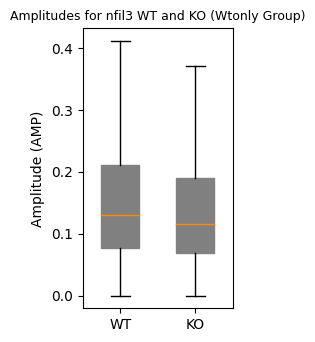

P-value for t-test between nfil3 WT and KO: 3.13e-11


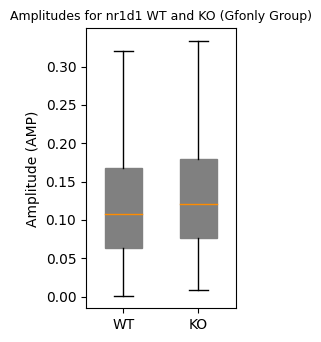

P-value for t-test between nr1d1 WT and KO: 1.94e-02


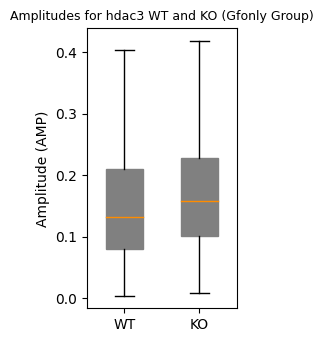

P-value for t-test between hdac3 WT and KO: 2.01e-03


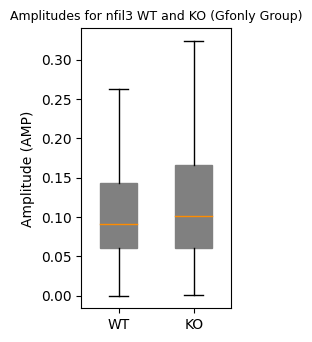

P-value for t-test between nfil3 WT and KO: 8.09e-02


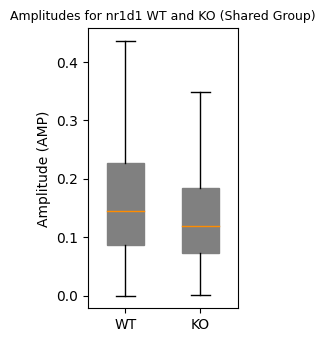

P-value for t-test between nr1d1 WT and KO: 5.27e-33


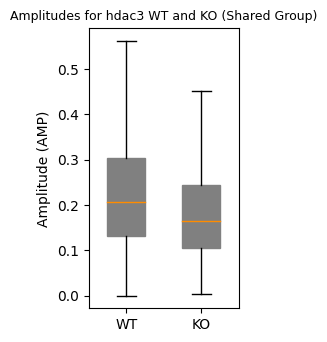

P-value for t-test between hdac3 WT and KO: 4.01e-36


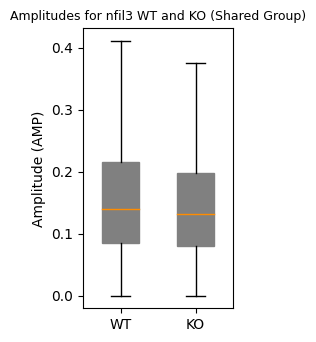

P-value for t-test between nfil3 WT and KO: 1.13e-06


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

def plot_comparison(group, gene, files):
    # Read data and extract AMP values
    amplitudes = []
    for file in files:
        df = pd.read_csv(file, sep='\t')  # assuming tab-separated values
        cleaned_amp = df['meta2d_rAMP'].dropna().tolist()
        if cleaned_amp:  # Check if list is not empty
            amplitudes.append(cleaned_amp)

    # Calculate t-test significance between the two conditions
    p_value = ttest_ind(amplitudes[0], amplitudes[1], equal_var=False).pvalue

    # Plotting
    plt.figure(figsize=(10, 8))  # Adjust the figure size if needed

    # Set positions explicitly to control box width
    positions = [1, 2]
    boxes = plt.boxplot(amplitudes, positions=positions, widths=0.5, vert=True, patch_artist=True, showfliers=False)

    # Apply colors
    color = {
        'boxes': 'grey',
        'whiskers': 'black',
        'medians': 'DarkOrange',
        'caps': 'black'
    }

    # Set the colors for the boxes, whiskers, caps, and medians explicitly
    for element in ['boxes', 'whiskers', 'caps']:
        plt.setp(boxes[element], color=color[element])
    plt.setp(boxes['medians'], color=color['medians'])

    # Labels
    labels = ['WT', 'KO']
    plt.xticks(positions, labels)
    plt.ylabel('Amplitude (AMP)')
    plt.title(f'Amplitudes for {gene} WT and KO ({group.capitalize()} Group)', fontsize=9)

    # Annotate significance on the plot
    y_max = max([max(lst) for lst in amplitudes if lst])  # Safeguard against empty lists
    y_pos = y_max + y_max * 0.1  # slightly above the highest data point
    x_pos = sum(positions) / len(positions)  # in the middle of the two positions
    p_text = f'p = {p_value:.2e}'  # Adjusted formatting for better legibility

    plt.annotate(p_text, xy=(x_pos, y_pos), xytext=(x_pos, y_pos), ha='center', va='bottom')

    # Adjust layout to fit everything
    plt.subplots_adjust(left=0.55, right=0.7, top=0.5, bottom=0.15)

    plt.savefig(f"{group}_{gene}_WT_KO_boxplot.pdf", bbox_inches='tight')
    plt.show()

    print(f"P-value for t-test between {gene} WT and KO: {p_value:.2e}")  # More readable scientific notation

# File groups
groups = ['wtonly', 'gfonly', 'shared']
genes = ['nr1d1', 'hdac3', 'nfil3']
meta_files = [
    ('meta2d_nr1d1_WT.txt', 'meta2d_nr1d1_KO.txt'),
    ('meta2d_hdac3_WT.txt', 'meta2d_hdac3_KO.txt'),
    ('meta2d_nfil3_WT.txt', 'meta2d_nfil3_KO.txt')
]

# Loop through all groups and genes
for group in groups:
    for gene, (wt_file, ko_file) in zip(genes, meta_files):
        files = [f"{group}_{wt_file}", f"{group}_{ko_file}"]
        plot_comparison(group, gene, files)


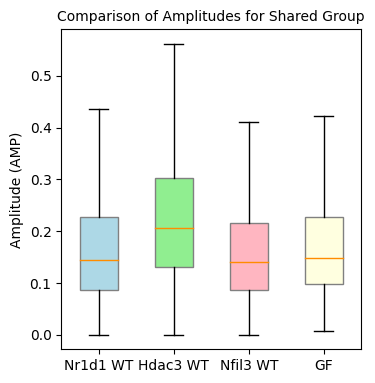

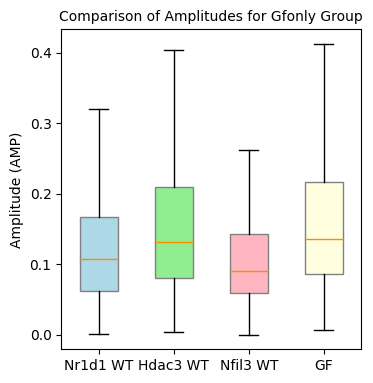

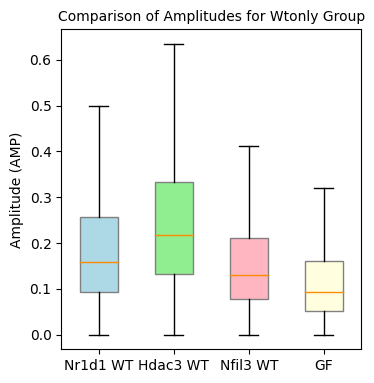

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

def plot_comparison(group, files):
    # Read data and extract AMP values
    amplitudes = []
    for file in files:
        df = pd.read_csv(file, sep='\t')  # assuming tab-separated values
        cleaned_amp = df['meta2d_rAMP'].dropna().tolist()
        amplitudes.append(cleaned_amp)

    # Calculate t-test significance between the conditions
    p_values = []
    for i in range(len(amplitudes)):
        for j in range(i + 1, len(amplitudes)):
            p_value = ttest_ind(amplitudes[i], amplitudes[j], equal_var=False).pvalue
            p_values.append((i, j, p_value))

    # Plotting
    plt.figure(figsize=(12, 8))  # Adjust the figure size if needed

    # Set positions explicitly to control box width
    positions = list(range(1, len(files) + 1))
    boxes = plt.boxplot(amplitudes, positions=positions, widths=0.5, vert=True, patch_artist=True, showfliers=False)

    # Apply colors
    color = {
        'boxes': 'grey',
        'whiskers': 'black',
        'medians': 'DarkOrange',
        'caps': 'black'
    }

    # Set the colors for the boxes, whiskers, caps, and medians explicitly
    for element in ['boxes', 'whiskers', 'caps']:
        plt.setp(boxes[element], color=color[element])
    plt.setp(boxes['medians'], color=color['medians'])

    # Fill colors for boxes
    fill_colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow']
    for patch, fill_color in zip(boxes['boxes'], fill_colors):
        patch.set_facecolor(fill_color)

    # Labels
    labels = ['Nr1d1 WT', 'Hdac3 WT', 'Nfil3 WT', 'GF']
    plt.xticks(positions, labels)
    plt.ylabel('Amplitude (AMP)')
    plt.title(f'Comparison of Amplitudes for {group.capitalize()} Group', fontsize=10)

    # Annotate significance on the plot
    for i, j, p_value in p_values:
        y_max_i = max(amplitudes[i])
        y_max_j = max(amplitudes[j])
        y_pos = max(y_max_i, y_max_j) + 0.1 * max(y_max_i, y_max_j)
        x_pos = (positions[i] + positions[j]) / 2
        p_text = f'p = {p_value:.2e}'
        plt.annotate(p_text, xy=(x_pos, y_pos), xytext=(x_pos, y_pos), ha='center', va='bottom')

    # Adjust layout to fit everything
    plt.subplots_adjust(left=0.15, right=0.4, top=0.5, bottom=0.1)

    plt.savefig(f"{group}_comparison_boxplot.pdf", bbox_inches='tight')
    plt.show()

# File groups and corresponding files
groups = ['shared', 'gfonly', 'wtonly']
files_dict = {
    'shared': [
        'shared_meta2d_nr1d1_WT.txt',
        'shared_meta2d_hdac3_WT.txt',
        'shared_meta2d_nfil3_WT.txt',
        'shared_meta2d_GF.txt'
    ],
    'gfonly': [
        'gfonly_meta2d_nr1d1_WT.txt',
        'gfonly_meta2d_hdac3_WT.txt',
        'gfonly_meta2d_nfil3_WT.txt',
        'gfonly_meta2d_GF.txt'
    ],
    'wtonly': [
        'wtonly_meta2d_nr1d1_WT.txt',
        'wtonly_meta2d_hdac3_WT.txt',
        'wtonly_meta2d_nfil3_WT.txt',
        'wtonly_meta2d_GF.txt'
    ]
}

# Loop through all groups and plot comparisons
for group in groups:
    plot_comparison(group, files_dict[group])
